In [137]:
!pip install pandas requests beautifulsoup4


In [138]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [139]:
data = pd.read_csv("data/cleaned_merged_seasons.csv")

/var/folders/qd/f3tp1jjj71d4q3zrsc02g6xr0000gn/T/ipykernel_80819/4141772547.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/cleaned_merged_seasons.csv")


In [140]:
data.columns

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [141]:
#change total_point to points
data = data.rename(columns={"total_points": "points"})


In [142]:
data.columns

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW'],
      dtype='object')

In [143]:
# Load data into a DataFrame
df = pd.DataFrame(data)

# Step 1: Filter data from the 2018-2019 season onwards
df = df[df['season_x'].isin(['2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24', '2024-25'])]



In [144]:
#convert was home to inr
df['was_home'] = df['was_home'].astype(int)


In [145]:
df[df["name"]=="Mohamed Salah"].head(1)

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
20335,2020-21,Mohamed Salah,MID,Liverpool,0,3,69,0,50.1,254,...,4.0,161.0,20,0,0,0,120,1,0,1


In [146]:
#data of previous game with points of game after
df['points_after'] = df.groupby('element')['points'].shift(-1)

In [147]:
#first row of mo salah

df[df['name'] == "Mohamed Salah"].head(1)


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,threat,points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,points_after
20335,2020-21,Mohamed Salah,MID,Liverpool,0,3,69,0,50.1,254,...,161.0,20,0,0,0,120,1,0,1,3.0


In [148]:
df['kickoff_time'] = pd.to_datetime(df['kickoff_time'])
df['start_hour'] = df['kickoff_time'].dt.hour

In [149]:


#split into four sets for differnt positions
df_gk = df[df['position'] == 'GK']
df_def = df[df['position'] == 'DEF']
df_mid = df[df['position'] == 'MID']
df_fwd = df[df['position'] == 'FWD']


In [150]:
print(df_gk.columns)

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW', 'points_after', 'start_hour'],
      dtype='object')


In [151]:
#separate vars specific to each position ...  clean sheets for gk and df as they get points for it
gk_vars  = ["season_x", "name","team_x", "assists","bonus","bps", "clean_sheets", "creativity", "goals_conceded", "goals_scored", "ict_index", "influence","start_hour", "minutes","opponent_team","opp_team_name","own_goals", "penalties_missed", "penalties_saved", "red_cards", "saves", "selected", "team_a_score", "team_h_score", "threat","transfers_in", "transfers_out", "value","was_home", "yellow_cards", "points", "points_after"]

#defender vars
def_vars = ["season_x", "name","team_x", "assists","bonus","bps", "clean_sheets", "creativity", "goals_conceded", "goals_scored", "ict_index", "influence", "start_hour","minutes","opponent_team","opp_team_name","own_goals", "penalties_missed", "red_cards", "selected", "team_a_score", "team_h_score", "threat","transfers_in", "transfers_out", "value","was_home", "yellow_cards", "points", "points_after"]

#midfielder vars
mid_vars = ["season_x", "name","team_x", "assists","bonus","bps", "creativity", "goals_conceded", "goals_scored", "ict_index", "influence","start_hour", "minutes","opponent_team","opp_team_name","own_goals", "penalties_missed", "red_cards", "selected", "team_a_score", "team_h_score", "threat","transfers_in", "transfers_out", "value","was_home", "yellow_cards", "points", "points_after"]

#forward vars

fwd_vars = ["season_x", "name","team_x", "assists","bonus","bps", "creativity", "goals_conceded", "goals_scored", "ict_index", "influence", "start_hour","minutes","opponent_team","opp_team_name","own_goals", "penalties_missed", "red_cards", "selected", "team_a_score", "team_h_score", "threat","transfers_in", "transfers_out", "value","was_home", "yellow_cards", "points", "points_after"]




In [152]:
#apply the vars to the dataframes, for start hour, get it from the kick off time first before applying it 

df_gk = df_gk[gk_vars]
df_def = df_def[def_vars]
df_mid = df_mid[mid_vars]
df_fwd = df_fwd[fwd_vars]




In [153]:
#show the hours of the games
df_gk['start_hour'].unique()



array([17, 16, 14, 11, 19, 13, 15, 18, 20, 12], dtype=int32)

In [154]:
#drop season_x as it is not needed
df_gk = df_gk.drop(columns=["season_x"])
df_def = df_def.drop(columns=["season_x"])
df_mid = df_mid.drop(columns=["season_x"])
df_fwd = df_fwd.drop(columns=["season_x"])


In [155]:
#save the data
df_gk.to_csv('data/cleaned_merged_seasons_gk.csv', index=False)
df_def.to_csv('data/cleaned_merged_seasons_def.csv', index=False)
df_mid.to_csv('data/cleaned_merged_seasons_mid.csv', index=False)
df_fwd.to_csv('data/cleaned_merged_seasons_fwd.csv', index=False)


In [156]:
#apply label encoding to the team names
label_encoder = LabelEncoder()
df_gk['team_x'] = label_encoder.fit_transform(df_gk['team_x'])
df_def['team_x'] = label_encoder.fit_transform(df_def['team_x'])
df_mid['team_x'] = label_encoder.fit_transform(df_mid['team_x'])
df_fwd['team_x'] = label_encoder.fit_transform(df_fwd['team_x'])

#apply label encoding to the opponent team names
df_gk['opponent_team'] = label_encoder.fit_transform(df_gk['opponent_team'])
df_def['opponent_team'] = label_encoder.fit_transform(df_def['opponent_team'])
df_mid['opponent_team'] = label_encoder.fit_transform(df_mid['opponent_team'])
df_fwd['opponent_team'] = label_encoder.fit_transform(df_fwd['opponent_team'])


#apply label encoding to the player names
df_gk['name'] = label_encoder.fit_transform(df_gk['name'])
df_def['name'] = label_encoder.fit_transform(df_def['name'])
df_mid['name'] = label_encoder.fit_transform(df_mid['name'])
df_fwd['name'] = label_encoder.fit_transform(df_fwd['name'])

#apply label encoding to the opponent team names

df_gk['opp_team_name'] = label_encoder.fit_transform(df_gk['opp_team_name'])
df_def['opp_team_name'] = label_encoder.fit_transform(df_def['opp_team_name'])
df_mid['opp_team_name'] = label_encoder.fit_transform(df_mid['opp_team_name'])
df_fwd['opp_team_name'] = label_encoder.fit_transform(df_fwd['opp_team_name'])




In [157]:
#save the data
df_gk.to_csv('data/cleaned_merged_seasons_gk.csv', index=False)
df_def.to_csv('data/cleaned_merged_seasons_def.csv', index=False)
df_mid.to_csv('data/cleaned_merged_seasons_mid.csv', index=False)
df_fwd.to_csv('data/cleaned_merged_seasons_fwd.csv', index=False)


In [158]:
#do exploratory data analysis for gk 
df_gk.describe()


,name,team_x,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,transfers_in,transfers_out,value,was_home,yellow_cards,points,points_after
count,11781.000000,11781.000000,11781.000000,11781.000000,11781.000000,11781.000000,11781.00000,11781.000000,11781.000000,11781.000000,...,11781.000000,11781.000000,11781.000000,11781.000000,11781.000000,11781.000000,11781.000000,11781.000000,11781.000000,11681.000000
mean,90.420083,11.477803,0.000934,0.079195,4.749003,0.067821,0.06693,0.372549,0.000085,0.609821,...,1.340633,1.588660,0.004753,10444.365758,9568.804346,43.415839,0.498939,0.014770,0.915033,0.927917
std,54.542966,7.564165,0.030544,0.417681,8.909509,0.251449,0.87439,0.917842,0.009213,1.278673,...,1.244753,1.369776,0.232674,32020.815958,26266.666832,4.800978,0.500020,0.120634,2.119157,2.132939
min,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000,-3.000000,-3.000000
25%,41.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,63.000000,147.000000,40.000000,0.000000,0.000000,0.000000,0.000000
50%,93.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,327.000000,948.000000,42.000000,0.000000,0.000000,0.000000,0.000000
75%,137.000000,18.000000,0.000000,0.000000,7.000000,0.000000,0.00000,0.000000,0.000000,0.200000,...,2.000000,2.000000,0.000000,5032.000000,7316.000000,45.000000,1.000000,0.000000,0.000000,1.000000
max,182.000000,25.000000,1.000000,3.000000,51.000000,1.000000,30.00000,9.000000,1.000000,9.800000,...,8.000000,9.000000,17.000000,758313.000000,939179.000000,63.000000,1.000000,1.000000,15.000000,15.000000


/Users/nayeb/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


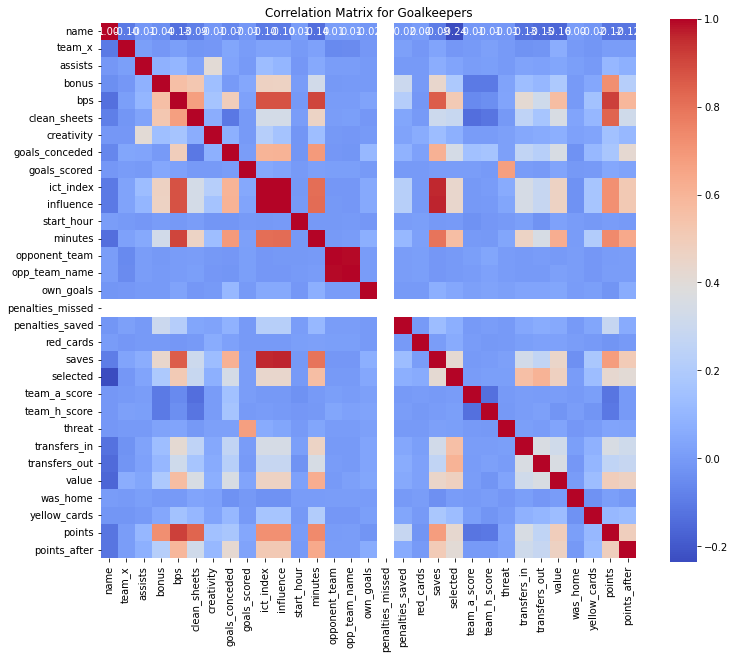

In [159]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numerical columns for correlation matrix
gk_numerical = df_gk.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numerical columns
gk_corr = gk_numerical.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(gk_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix for Goalkeepers')
plt.show()

In [160]:
# Select only numerical columns for correlation matrix
gk_numerical = df_gk.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numerical columns
gk_corr = gk_numerical.corr()

gk_corr

,name,team_x,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,transfers_in,transfers_out,value,was_home,yellow_cards,points,points_after
name,1.000000,-0.103341,-0.012261,-0.041566,-0.134082,-0.091561,-0.009836,-0.066489,-0.014261,-0.104182,...,-0.009984,-0.011538,-0.012867,-0.127431,-0.147614,-0.159619,0.001001,-0.016580,-0.117079,-0.117833
team_x,-0.103341,1.000000,0.013133,-0.012462,0.010854,-0.016592,-0.011652,0.037585,0.000636,0.024289,...,-0.003980,0.016406,-0.004378,-0.026073,-0.022632,0.063966,-0.002885,-0.018619,0.004953,0.005881
assists,-0.012261,0.013133,1.000000,0.080707,0.100060,0.024913,0.407692,0.029984,-0.000282,0.126919,...,0.007263,0.011210,-0.000625,0.028844,0.022415,0.038454,0.013961,-0.003743,0.103523,0.074319
bonus,-0.041566,-0.012462,0.080707,1.000000,0.556106,0.524347,0.137917,-0.001459,0.042372,0.469613,...,-0.103977,-0.105230,0.025825,0.132984,0.102558,0.188002,-0.000207,0.042490,0.723734,0.217320
bps,-0.134082,0.010854,0.100060,0.556106,1.000000,0.671926,0.161030,0.492463,0.024045,0.876739,...,-0.054636,-0.042468,0.030756,0.418536,0.315988,0.569275,-0.003938,0.151699,0.917099,0.589544
clean_sheets,-0.091561,-0.016592,0.024913,0.524347,0.671926,1.000000,0.063870,-0.109488,-0.002485,0.336435,...,-0.139723,-0.116661,-0.005511,0.255361,0.164688,0.354040,0.031293,0.104104,0.833329,0.319279
creativity,-0.009836,-0.011652,0.407692,0.137917,0.161030,0.063870,1.000000,0.076861,-0.000705,0.221867,...,0.000913,0.000889,0.015460,0.046061,0.053984,0.068554,0.020151,0.030947,0.145208,0.108513
goals_conceded,-0.066489,0.037585,0.029984,-0.001459,0.492463,-0.109488,0.076861,1.000000,0.006299,0.603049,...,0.145779,0.163965,0.018737,0.265535,0.226979,0.356872,-0.032895,0.109771,0.170251,0.422994
goals_scored,-0.014261,0.000636,-0.000282,0.042372,0.024045,-0.002485,-0.000705,0.006299,1.000000,0.044606,...,0.004881,-0.003960,0.673017,0.002937,-0.001852,0.029909,-0.009194,-0.001128,0.039501,0.026342
ict_index,-0.104182,0.024289,0.126919,0.469613,0.876739,0.336435,0.221867,0.603049,0.044606,1.000000,...,-0.007291,-0.000039,0.055625,0.345299,0.283500,0.465241,-0.031975,0.168782,0.717825,0.515713


In [161]:
#Select only numerical columns for correlation matrix

df_def_numerical = df_def.select_dtypes(include=['number'])

df_def_corr = df_def_numerical.corr()

df_mid_numerical = df_mid.select_dtypes(include=['number'])

df_mid_corr = df_mid_numerical.corr()

df_fwd_numerical = df_fwd.select_dtypes(include=['number'])

df_fwd_corr = df_fwd_numerical.corr()


/Users/nayeb/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


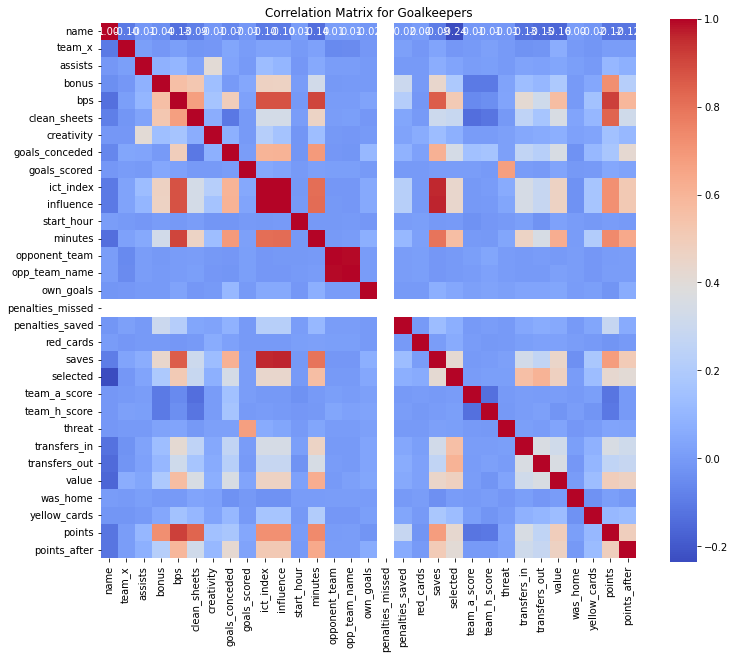

/Users/nayeb/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


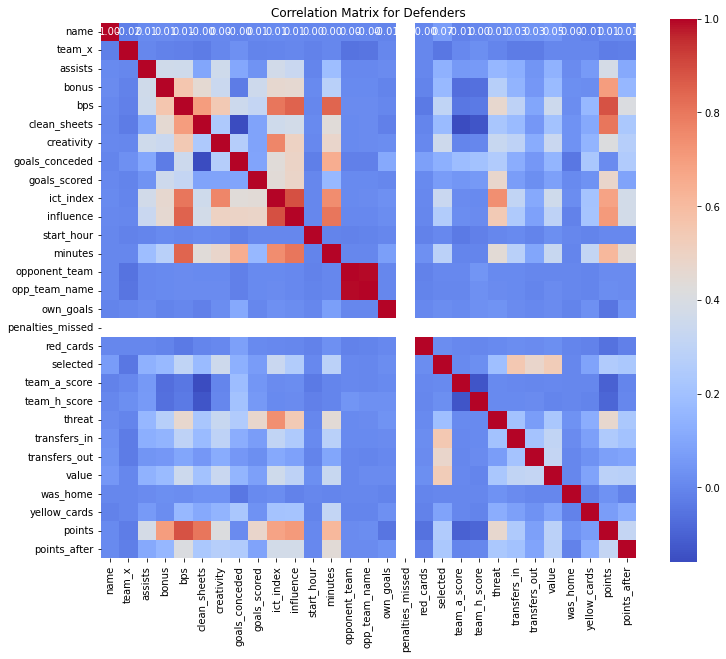

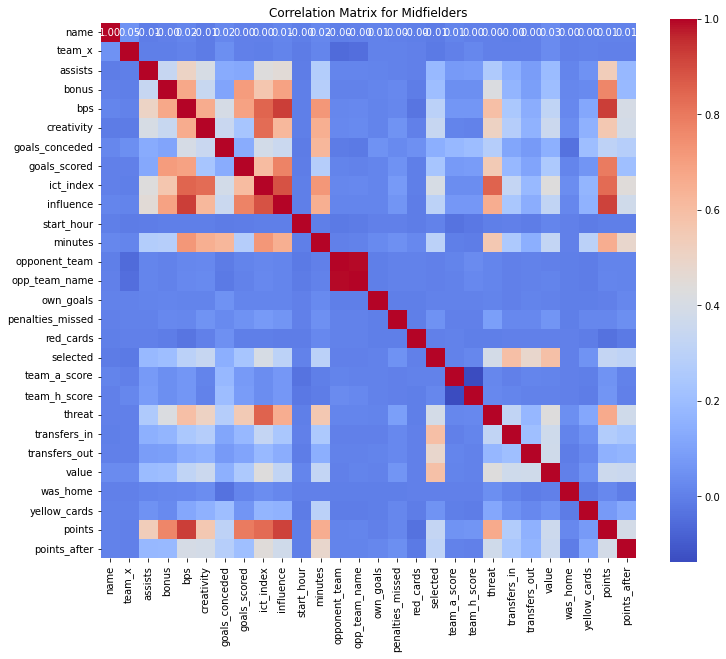

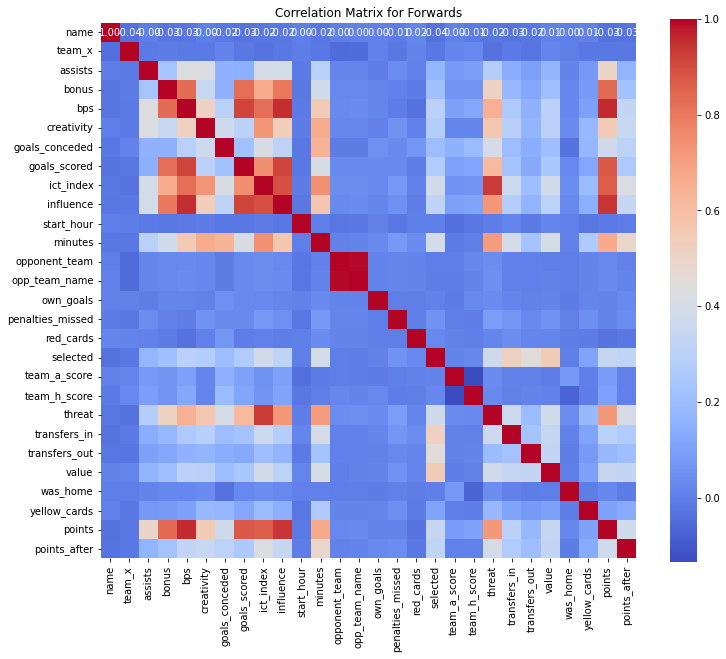

In [162]:
# Plot the correlation matrix for each position separately

# Goalkeepers
plt.figure(figsize=(12, 10))
sns.heatmap(gk_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix for Goalkeepers')
plt.show()

# Defenders
plt.figure(figsize=(12, 10))
sns.heatmap(df_def_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix for Defenders')
plt.show()

# Midfielders
plt.figure(figsize=(12, 10))
sns.heatmap(df_mid_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix for Midfielders')
plt.show()

# Forwards
plt.figure(figsize=(12, 10))
sns.heatmap(df_fwd_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix for Forwards')
plt.show()


In [ ]:
!pip install pandas requests beautifulsoup4


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv("data/cleaned_merged_seasons.csv")

/var/folders/qd/f3tp1jjj71d4q3zrsc02g6xr0000gn/T/ipykernel_80819/4141772547.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/cleaned_merged_seasons.csv")


In [ ]:
data.columns

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [ ]:
#change total_point to points
data = data.rename(columns={"total_points": "points"})


In [ ]:
data.columns

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW'],
      dtype='object')

In [ ]:
# Load data into a DataFrame
df = pd.DataFrame(data)

# Step 1: Filter data from the 2018-2019 season onwards
df = df[df['season_x'].isin(['2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24', '2024-25'])]



In [ ]:
#convert was home to inr
df['was_home'] = df['was_home'].astype(int)


In [ ]:
df[df["name"]=="Mohamed Salah"].head(1)

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
20335,2020-21,Mohamed Salah,MID,Liverpool,0,3,69,0,50.1,254,...,4.0,161.0,20,0,0,0,120,1,0,1


In [ ]:
#data of previous game with points of game after
df['points_after'] = df.groupby('element')['points'].shift(-1)

In [ ]:
#first row of mo salah

df[df['name'] == "Mohamed Salah"].head(1)


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,threat,points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,points_after
20335,2020-21,Mohamed Salah,MID,Liverpool,0,3,69,0,50.1,254,...,161.0,20,0,0,0,120,1,0,1,3.0


In [ ]:
df['kickoff_time'] = pd.to_datetime(df['kickoff_time'])
df['start_hour'] = df['kickoff_time'].dt.hour

In [ ]:


#split into four sets for differnt positions
df_gk = df[df['position'] == 'GK']
df_def = df[df['position'] == 'DEF']
df_mid = df[df['position'] == 'MID']
df_fwd = df[df['position'] == 'FWD']


In [ ]:
print(df_gk.columns)

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW', 'points_after', 'start_hour'],
      dtype='object')


In [ ]:
#separate vars specific to each position ...  clean sheets for gk and df as they get points for it
gk_vars  = ["season_x", "name","team_x", "assists","bonus","bps", "clean_sheets", "creativity", "goals_conceded", "goals_scored", "ict_index", "influence","start_hour", "minutes","opponent_team","opp_team_name","own_goals", "penalties_missed", "penalties_saved", "red_cards", "saves", "selected", "team_a_score", "team_h_score", "threat","transfers_in", "transfers_out", "value","was_home", "yellow_cards", "points", "points_after"]

#defender vars
def_vars = ["season_x", "name","team_x", "assists","bonus","bps", "clean_sheets", "creativity", "goals_conceded", "goals_scored", "ict_index", "influence", "start_hour","minutes","opponent_team","opp_team_name","own_goals", "penalties_missed", "red_cards", "selected", "team_a_score", "team_h_score", "threat","transfers_in", "transfers_out", "value","was_home", "yellow_cards", "points", "points_after"]

#midfielder vars
mid_vars = ["season_x", "name","team_x", "assists","bonus","bps", "creativity", "goals_conceded", "goals_scored", "ict_index", "influence","start_hour", "minutes","opponent_team","opp_team_name","own_goals", "penalties_missed", "red_cards", "selected", "team_a_score", "team_h_score", "threat","transfers_in", "transfers_out", "value","was_home", "yellow_cards", "points", "points_after"]

#forward vars

fwd_vars = ["season_x", "name","team_x", "assists","bonus","bps", "creativity", "goals_conceded", "goals_scored", "ict_index", "influence", "start_hour","minutes","opponent_team","opp_team_name","own_goals", "penalties_missed", "red_cards", "selected", "team_a_score", "team_h_score", "threat","transfers_in", "transfers_out", "value","was_home", "yellow_cards", "points", "points_after"]




In [ ]:
#apply the vars to the dataframes, for start hour, get it from the kick off time first before applying it 

df_gk = df_gk[gk_vars]
df_def = df_def[def_vars]
df_mid = df_mid[mid_vars]
df_fwd = df_fwd[fwd_vars]




In [ ]:
#show the hours of the games
df_gk['start_hour'].unique()



array([17, 16, 14, 11, 19, 13, 15, 18, 20, 12], dtype=int32)

In [ ]:
#drop season_x as it is not needed
df_gk = df_gk.drop(columns=["season_x"])
df_def = df_def.drop(columns=["season_x"])
df_mid = df_mid.drop(columns=["season_x"])
df_fwd = df_fwd.drop(columns=["season_x"])


In [ ]:
#save the data
df_gk.to_csv('data/cleaned_merged_seasons_gk.csv', index=False)
df_def.to_csv('data/cleaned_merged_seasons_def.csv', index=False)
df_mid.to_csv('data/cleaned_merged_seasons_mid.csv', index=False)
df_fwd.to_csv('data/cleaned_merged_seasons_fwd.csv', index=False)


In [ ]:
#apply label encoding to the team names
label_encoder = LabelEncoder()
df_gk['team_x'] = label_encoder.fit_transform(df_gk['team_x'])
df_def['team_x'] = label_encoder.fit_transform(df_def['team_x'])
df_mid['team_x'] = label_encoder.fit_transform(df_mid['team_x'])
df_fwd['team_x'] = label_encoder.fit_transform(df_fwd['team_x'])

#apply label encoding to the opponent team names
df_gk['opponent_team'] = label_encoder.fit_transform(df_gk['opponent_team'])
df_def['opponent_team'] = label_encoder.fit_transform(df_def['opponent_team'])
df_mid['opponent_team'] = label_encoder.fit_transform(df_mid['opponent_team'])
df_fwd['opponent_team'] = label_encoder.fit_transform(df_fwd['opponent_team'])


#apply label encoding to the player names
df_gk['name'] = label_encoder.fit_transform(df_gk['name'])
df_def['name'] = label_encoder.fit_transform(df_def['name'])
df_mid['name'] = label_encoder.fit_transform(df_mid['name'])
df_fwd['name'] = label_encoder.fit_transform(df_fwd['name'])

#apply label encoding to the opponent team names

df_gk['opp_team_name'] = label_encoder.fit_transform(df_gk['opp_team_name'])
df_def['opp_team_name'] = label_encoder.fit_transform(df_def['opp_team_name'])
df_mid['opp_team_name'] = label_encoder.fit_transform(df_mid['opp_team_name'])
df_fwd['opp_team_name'] = label_encoder.fit_transform(df_fwd['opp_team_name'])




In [ ]:
#save the data
df_gk.to_csv('data/cleaned_merged_seasons_gk.csv', index=False)
df_def.to_csv('data/cleaned_merged_seasons_def.csv', index=False)
df_mid.to_csv('data/cleaned_merged_seasons_mid.csv', index=False)
df_fwd.to_csv('data/cleaned_merged_seasons_fwd.csv', index=False)


In [ ]:
#do exploratory data analysis for gk 
df_gk.describe()


,name,team_x,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,transfers_in,transfers_out,value,was_home,yellow_cards,points,points_after
count,11781.000000,11781.000000,11781.000000,11781.000000,11781.000000,11781.000000,11781.00000,11781.000000,11781.000000,11781.000000,...,11781.000000,11781.000000,11781.000000,11781.000000,11781.000000,11781.000000,11781.000000,11781.000000,11781.000000,11681.000000
mean,90.420083,11.477803,0.000934,0.079195,4.749003,0.067821,0.06693,0.372549,0.000085,0.609821,...,1.340633,1.588660,0.004753,10444.365758,9568.804346,43.415839,0.498939,0.014770,0.915033,0.927917
std,54.542966,7.564165,0.030544,0.417681,8.909509,0.251449,0.87439,0.917842,0.009213,1.278673,...,1.244753,1.369776,0.232674,32020.815958,26266.666832,4.800978,0.500020,0.120634,2.119157,2.132939
min,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000,-3.000000,-3.000000
25%,41.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,63.000000,147.000000,40.000000,0.000000,0.000000,0.000000,0.000000
50%,93.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,327.000000,948.000000,42.000000,0.000000,0.000000,0.000000,0.000000
75%,137.000000,18.000000,0.000000,0.000000,7.000000,0.000000,0.00000,0.000000,0.000000,0.200000,...,2.000000,2.000000,0.000000,5032.000000,7316.000000,45.000000,1.000000,0.000000,0.000000,1.000000
max,182.000000,25.000000,1.000000,3.000000,51.000000,1.000000,30.00000,9.000000,1.000000,9.800000,...,8.000000,9.000000,17.000000,758313.000000,939179.000000,63.000000,1.000000,1.000000,15.000000,15.000000


/Users/nayeb/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


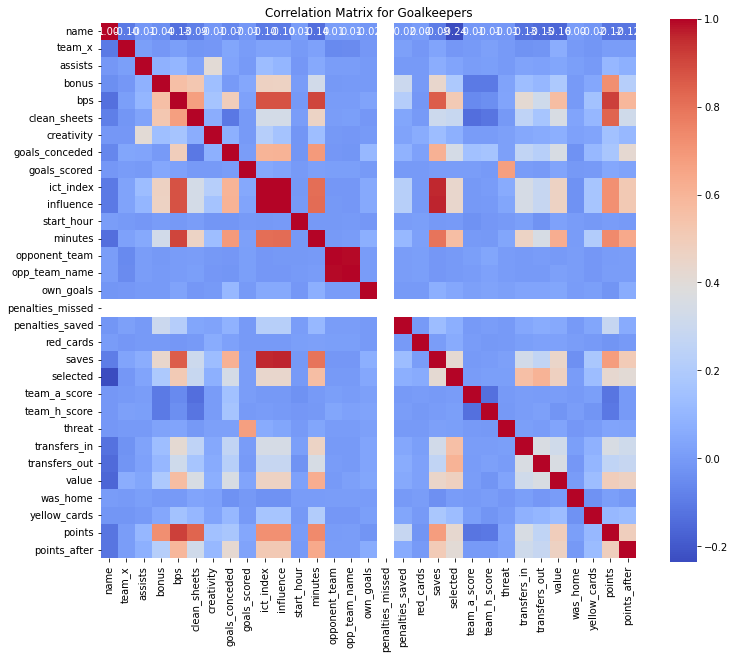

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numerical columns for correlation matrix
gk_numerical = df_gk.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numerical columns
gk_corr = gk_numerical.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(gk_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix for Goalkeepers')
plt.show()

In [ ]:
# Select only numerical columns for correlation matrix
gk_numerical = df_gk.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numerical columns
gk_corr = gk_numerical.corr()

gk_corr

,name,team_x,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,transfers_in,transfers_out,value,was_home,yellow_cards,points,points_after
name,1.000000,-0.103341,-0.012261,-0.041566,-0.134082,-0.091561,-0.009836,-0.066489,-0.014261,-0.104182,...,-0.009984,-0.011538,-0.012867,-0.127431,-0.147614,-0.159619,0.001001,-0.016580,-0.117079,-0.117833
team_x,-0.103341,1.000000,0.013133,-0.012462,0.010854,-0.016592,-0.011652,0.037585,0.000636,0.024289,...,-0.003980,0.016406,-0.004378,-0.026073,-0.022632,0.063966,-0.002885,-0.018619,0.004953,0.005881
assists,-0.012261,0.013133,1.000000,0.080707,0.100060,0.024913,0.407692,0.029984,-0.000282,0.126919,...,0.007263,0.011210,-0.000625,0.028844,0.022415,0.038454,0.013961,-0.003743,0.103523,0.074319
bonus,-0.041566,-0.012462,0.080707,1.000000,0.556106,0.524347,0.137917,-0.001459,0.042372,0.469613,...,-0.103977,-0.105230,0.025825,0.132984,0.102558,0.188002,-0.000207,0.042490,0.723734,0.217320
bps,-0.134082,0.010854,0.100060,0.556106,1.000000,0.671926,0.161030,0.492463,0.024045,0.876739,...,-0.054636,-0.042468,0.030756,0.418536,0.315988,0.569275,-0.003938,0.151699,0.917099,0.589544
clean_sheets,-0.091561,-0.016592,0.024913,0.524347,0.671926,1.000000,0.063870,-0.109488,-0.002485,0.336435,...,-0.139723,-0.116661,-0.005511,0.255361,0.164688,0.354040,0.031293,0.104104,0.833329,0.319279
creativity,-0.009836,-0.011652,0.407692,0.137917,0.161030,0.063870,1.000000,0.076861,-0.000705,0.221867,...,0.000913,0.000889,0.015460,0.046061,0.053984,0.068554,0.020151,0.030947,0.145208,0.108513
goals_conceded,-0.066489,0.037585,0.029984,-0.001459,0.492463,-0.109488,0.076861,1.000000,0.006299,0.603049,...,0.145779,0.163965,0.018737,0.265535,0.226979,0.356872,-0.032895,0.109771,0.170251,0.422994
goals_scored,-0.014261,0.000636,-0.000282,0.042372,0.024045,-0.002485,-0.000705,0.006299,1.000000,0.044606,...,0.004881,-0.003960,0.673017,0.002937,-0.001852,0.029909,-0.009194,-0.001128,0.039501,0.026342
ict_index,-0.104182,0.024289,0.126919,0.469613,0.876739,0.336435,0.221867,0.603049,0.044606,1.000000,...,-0.007291,-0.000039,0.055625,0.345299,0.283500,0.465241,-0.031975,0.168782,0.717825,0.515713


In [ ]:
#Select only numerical columns for correlation matrix

df_def_numerical = df_def.select_dtypes(include=['number'])

df_def_corr = df_def_numerical.corr()

df_mid_numerical = df_mid.select_dtypes(include=['number'])

df_mid_corr = df_mid_numerical.corr()

df_fwd_numerical = df_fwd.select_dtypes(include=['number'])

df_fwd_corr = df_fwd_numerical.corr()


/Users/nayeb/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


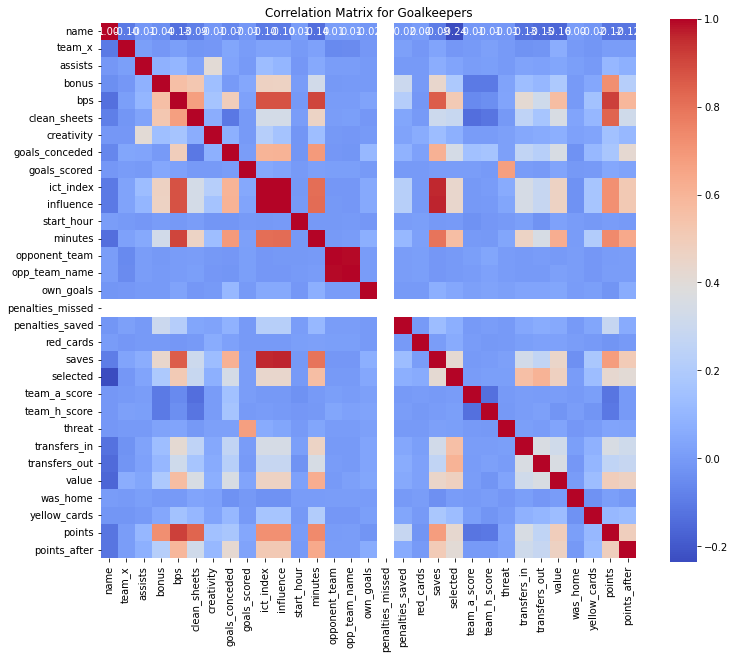

/Users/nayeb/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


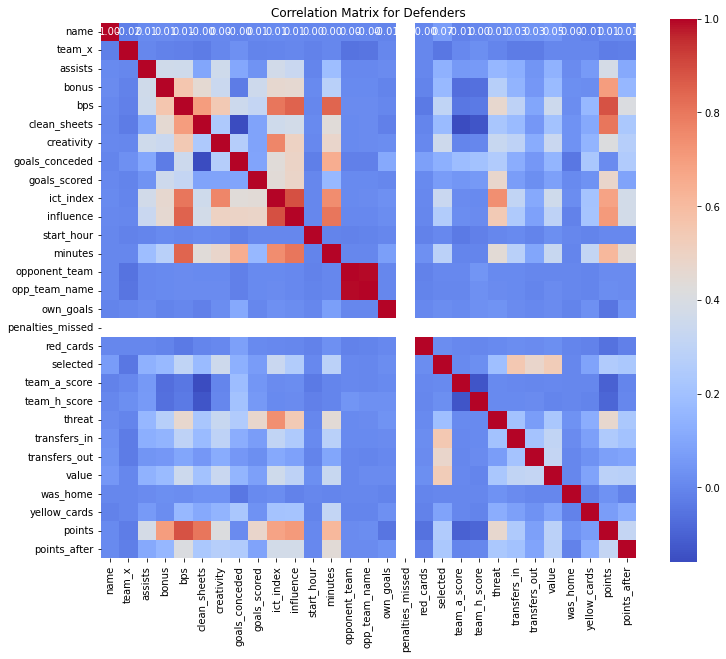

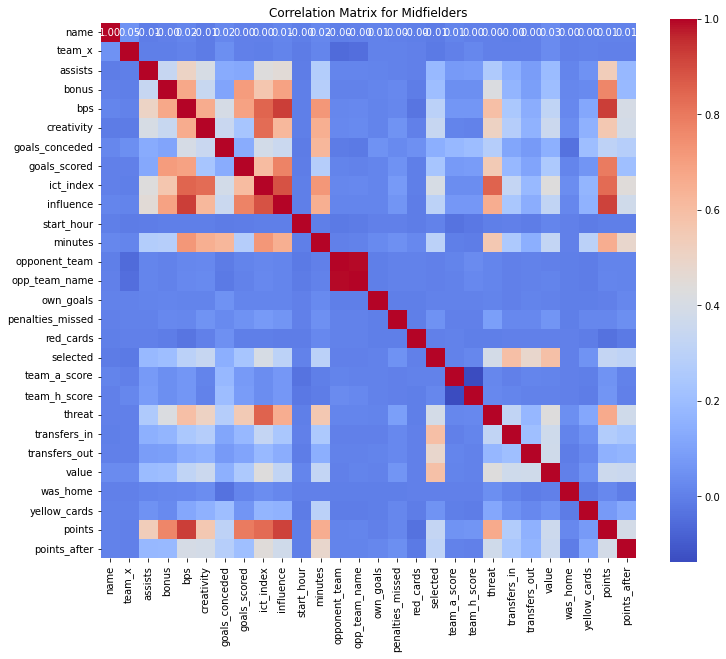

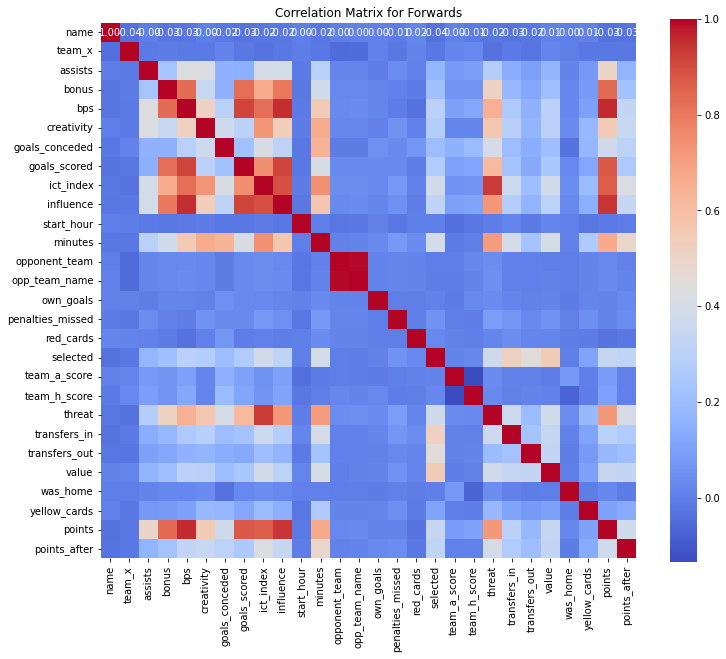

In [ ]:
# Plot the correlation matrix for each position separately

# Goalkeepers
plt.figure(figsize=(12, 10))
sns.heatmap(gk_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix for Goalkeepers')
plt.show()

# Defenders
plt.figure(figsize=(12, 10))
sns.heatmap(df_def_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix for Defenders')
plt.show()

# Midfielders
plt.figure(figsize=(12, 10))
sns.heatmap(df_mid_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix for Midfielders')
plt.show()

# Forwards
plt.figure(figsize=(12, 10))
sns.heatmap(df_fwd_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix for Forwards')
plt.show()


In [ ]:
#print numericals for correlation matrix of each position

print("gk")
print(gk_corr)
print("def")
print(df_def_corr)
print("mid")
print(df_mid_corr)
print("fwd")
print(df_fwd_corr)


gk
                      name    team_x   assists     bonus       bps  \
name              1.000000 -0.103341 -0.012261 -0.041566 -0.134082   
team_x           -0.103341  1.000000  0.013133 -0.012462  0.010854   
assists          -0.012261  0.013133  1.000000  0.080707  0.100060   
bonus            -0.041566 -0.012462  0.080707  1.000000  0.556106   
bps              -0.134082  0.010854  0.100060  0.556106  1.000000   
clean_sheets     -0.091561 -0.016592  0.024913  0.524347  0.671926   
creativity       -0.009836 -0.011652  0.407692  0.137917  0.161030   
goals_conceded   -0.066489  0.037585  0.029984 -0.001459  0.492463   
goals_scored     -0.014261  0.000636 -0.000282  0.042372  0.024045   
ict_index        -0.104182  0.024289  0.126919  0.469613  0.876739   
influence        -0.104872  0.025530  0.100300  0.466269  0.877499   
start_hour        0.009130 -0.003271 -0.012138  0.002865 -0.006291   
minutes          -0.137224  0.020819  0.052268  0.323949  0.906915   
opponent_team    

In [163]:
#print numericals for correlation matrix of each position

print("gk")
print(gk_corr)
print("def")
print(df_def_corr)
print("mid")
print(df_mid_corr)
print("fwd")
print(df_fwd_corr)


gk
                      name    team_x   assists     bonus       bps  \
name              1.000000 -0.103341 -0.012261 -0.041566 -0.134082   
team_x           -0.103341  1.000000  0.013133 -0.012462  0.010854   
assists          -0.012261  0.013133  1.000000  0.080707  0.100060   
bonus            -0.041566 -0.012462  0.080707  1.000000  0.556106   
bps              -0.134082  0.010854  0.100060  0.556106  1.000000   
clean_sheets     -0.091561 -0.016592  0.024913  0.524347  0.671926   
creativity       -0.009836 -0.011652  0.407692  0.137917  0.161030   
goals_conceded   -0.066489  0.037585  0.029984 -0.001459  0.492463   
goals_scored     -0.014261  0.000636 -0.000282  0.042372  0.024045   
ict_index        -0.104182  0.024289  0.126919  0.469613  0.876739   
influence        -0.104872  0.025530  0.100300  0.466269  0.877499   
start_hour        0.009130 -0.003271 -0.012138  0.002865 -0.006291   
minutes          -0.137224  0.020819  0.052268  0.323949  0.906915   
opponent_team    